# Imagenet Feature Extration

## Setting up environment

In [ ]:
# Execute just in remote environment

# !wget http://cs231n.stanford.edu/tiny-imagenet-200.zip
# !unzip tiny-imagenet-200.zip

bottleneck_features_train.npy  image-features-selector
bottleneck_features_valid.npy  py-image-feature-selector
feature_extraction.ipynb       tiny-imagenet-200


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3

## Getting features by using a pre-trained CNN (InceptionV3 over Imagenet data set)

### PoC with two images

In [2]:
# Tiny imagenet real size 64x64x3, but it is too small to use NNs 
# pre-trained with Imagenet dataset

width = height = 75
channels = 3

image_shape = (width, height, channels)

print('Input shape', image_shape)

Input shape (75, 75, 3)


PIL image size (75, 75)


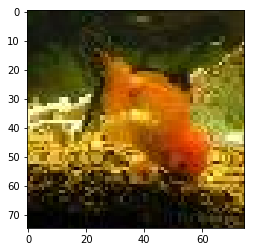

In [5]:
img_path_1 = 'tiny-imagenet-200/train/n01443537/images/n01443537_1.JPEG'
img_path_2 = 'tiny-imagenet-200/train/n01443537/images/n01443537_2.JPEG'

# load an image in PIL format
img_1 = image.load_img(img_path_1, target_size=image_shape)
img_2 = image.load_img(img_path_2, target_size=image_shape)

print('PIL image size',img_1.size)
plt.imshow(img_1)

In [6]:
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
x_1 = image.img_to_array(img_1)
x_2 = image.img_to_array(img_2)
print('Image numpy shape', x_1.shape)

Image numpy shape (75, 75, 3)


In [0]:
inception_v3_model = InceptionV3(
    include_top=False, 
    weights='imagenet',
    input_shape=image_shape
)

In [8]:
inception_v3_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 37, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 37, 37, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 37, 37, 32)   0           batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d_1 (

In [9]:
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.

x_1 = np.expand_dims(x_1, axis=0)
x_2 = np.expand_dims(x_2, axis=0)

print('After expand dims', x_1.shape)

x_1 = preprocess_input(x_1)
x_2 = preprocess_input(x_2)

print('After preprocess input', x_1.shape)

After expand dims (1, 75, 75, 3)
After preprocess input (1, 75, 75, 3)


In [10]:
for image_x in [x_1, x_2]:
  features = inception_v3_model.predict(image_x)
  print(features.shape)
  print(features[0][0][0][0:50])

(1, 1, 1, 2048)
[2.3763773  0.         0.20519146 1.4407341  1.320267   0.
 0.29496047 0.         2.3070326  0.         1.5774693  0.2774794
 1.9687539  1.0435967  1.3201514  0.         2.495193   0.
 0.         2.4081304  1.1226254  0.         1.6108843  0.
 0.         0.         0.         0.         1.9520698  0.
 0.08339962 2.056316   1.0959864  0.         0.         2.9463851
 1.6847534  0.7456823  0.30296972 0.17618969 1.4322504  2.9568603
 0.         0.8278407  0.         0.         0.         0.
 2.5642512  0.47378898]
(1, 1, 1, 2048)
[0.64327013 1.6403377  1.657605   0.7950125  0.8586178  2.0966501
 3.5965166  0.         0.         5.350757   6.660331   1.7956915
 1.2221057  4.509434   0.         0.         0.         0.
 1.7417401  4.0585747  4.8296404  0.         0.08383909 3.723269
 0.9332442  0.45416048 1.5434643  0.         0.         2.7612243
 0.         0.         5.3265505  0.         4.583038   3.4651039
 0.         2.034411   1.510948   1.2336477  5.872323   0.
 0. 

### PoC Feature Extraction of all training set

First, we need to create an image data generator, to load al the images from the training folder. ImageDataGenerator from Keras, loads the images and give them to the model.

In [0]:
# Image folders
imagenet_folder = 'tiny-imagenet-200'

train_folder = imagenet_folder +  '/train'
validation_folder = imagenet_folder +  '/val'

# Image dimensions
width = height = 75
channels = 3

# Image preprocessing
batch_size = 128
from_rgb_rescale = 1.0/255

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale=from_rgb_rescale)

train_generator = image_generator.flow_from_directory(
    directory=train_folder, 
    target_size=(width, height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

Found 100000 images belonging to 200 classes.


(75, 75, 3)


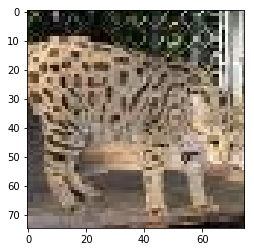

In [73]:
print(train_generator[batch_size-1][1].shape)
plt.imshow(train_generator[batch_size-1][1])

#### Load train labels

In [0]:
import os
import numpy as np

In [0]:
def get_label_from_file(file_name):
  folder_name = file_name.split('/')[0]
  
  return labels_dictionary[folder_name]

In [0]:
labels_dictionary = {}
for label, folder in enumerate(os.listdir(train_folder)):
  labels_dictionary[folder] = label

labels = np.array([get_label_from_file(f) for f in train_generator.filenames])

#### Load features file

In [7]:
import pickle

with open('bottleneck_features_train.npy','rb') as f:
    bottleneck_features_train = pickle.load(f)

In [8]:
bottleneck_features_train

array([[[[0.59752923, 0.        , 0.        , ..., 0.        ,
          0.9838199 , 0.        ],
         [1.0353587 , 0.        , 0.43726733, ..., 0.        ,
          0.4450344 , 0.        ],
         [1.0584285 , 0.        , 0.8024992 , ..., 0.        ,
          0.41612452, 0.        ]],

        [[1.2052565 , 0.        , 0.39860862, ..., 0.        ,
          0.43992478, 0.        ],
         [1.1835129 , 0.        , 1.0373083 , ..., 0.        ,
          0.34783375, 0.        ],
         [0.28127348, 0.        , 0.28534716, ..., 0.        ,
          0.13749081, 0.        ]],

        [[0.8153952 , 0.        , 0.17708975, ..., 0.        ,
          0.7356978 , 0.        ],
         [0.8797568 , 0.01803011, 0.58064944, ..., 0.01782202,
          0.6367028 , 0.        ],
         [0.61183214, 0.        , 0.5213173 , ..., 0.        ,
          0.65104765, 0.        ]]],


       [[[1.0273387 , 0.        , 0.        , ..., 0.        ,
          0.5508194 , 0.        ],
         [0.

In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

model = Sequential()
model.add(Flatten(input_shape=bottleneck_features_train.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 1,180,161
Trainable params: 1,180,161
Non-trainable params: 0
_________________________________________________________________
